# Exponential Moving Average (EMA)

Another form of moving average.

### Why is it important?
- Helps us confirm significant market moves

### Definition
- An indicator used to identify the direction of a current price trend, with a greater weight on recent data points.

### ETC
- For short-term averages, most popular EMAs are 12- and 26- day EMAs.
- For long-term trend indicators, most popular EMAs are 50- and 200-day EMAs.

### Reference
- https://www.ig.com/us/trading-strategies/10-trading-indicators-every-trader-should-know-190604?&CHID=1&QPID=2934542669&QPPID=1&gclid=CjwKCAjwhYOFBhBkEiwASF3KGdb375kr_k_y4GHnpWTXzmy5DgPv1ajqEpGhk7NsD7vOmb3poDrIcxoCIjQQAvD_BwE&gclsrc=aw.ds

In [ ]:
# This is not recommended if you use conda/anaconda
# (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
# !pip install pandas_datareader

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

In [26]:
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime.now()

In [27]:
google = web.DataReader('GOOGL', 'yahoo', start_date, end_date)
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900,1368.680054
2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400,1361.520020
2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400,1397.810059
2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500,1395.109985
2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700,1405.040039


`adjust=False` to prevent adjusting weights to account for imbalance in the beginning periods

In [28]:
google['12- day EMA'] = google['Adj Close'].ewm(span=12, adjust=False).mean()
google['12- day EMA']

Date
2020-01-02    1368.680054
2020-01-03    1367.578510
2020-01-06    1372.229517
2020-01-07    1375.749589
2020-01-08    1380.255812
                 ...     
2021-05-10    2316.937181
2021-05-11    2309.725316
2021-05-12    2292.882960
2021-05-13    2283.060972
2021-05-14    2282.340805
Name: 12- day EMA, Length: 345, dtype: float64

In [29]:
google['26- day EMA'] = google['Adj Close'].ewm(span=26, adjust=False).mean()
google['26- day EMA']

Date
2020-01-02    1368.680054
2020-01-03    1368.149681
2020-01-06    1370.346746
2020-01-07    1372.181060
2020-01-08    1374.615058
                 ...     
2021-05-10    2273.194002
2021-05-11    2272.961858
2021-05-12    2267.575794
2021-05-13    2264.721294
2021-05-14    2265.733041
Name: 26- day EMA, Length: 345, dtype: float64

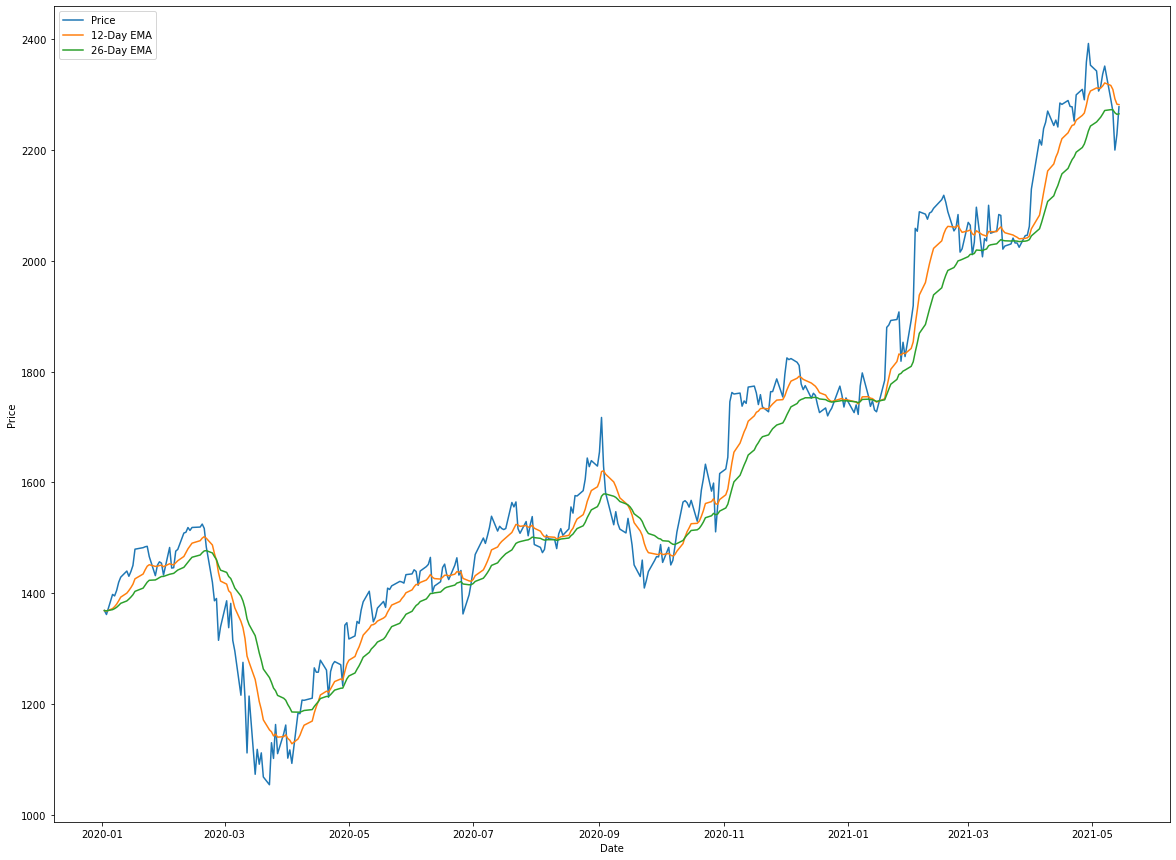

In [30]:
plt.figure(figsize=(20,15))

plt.plot(google['Adj Close'], label='Price')
plt.plot(google['12- day EMA'], label='12-Day EMA')
plt.plot(google['26- day EMA'], label='26-Day EMA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()